# Etude du Covid-19 en France 
SIR Model sur les données du Covid-19

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
from scipy import optimize, integrate
import random 

In [51]:
data = pd.read_csv("data.csv",sep=';')
data = data[data.nom == "italie"]

# Data Exploration

In [52]:
print(data.columns)
print(data.dtypes)
print("Dates entre", min(data['date']) , "et",max(data['date']), ", totale de", data['date'].nunique(), "jours")
data['guerisons'] = data['guerisons'].replace(np.nan, 0)
data['deces'] = data['deces'].replace(np.nan,0)
data.head(50)

Index(['date', 'code', 'nom', 'cas', 'deces', 'guerisons', 'source'], dtype='object')
date          object
code          object
nom           object
cas          float64
deces        float64
guerisons    float64
source        object
dtype: object
Dates entre 2020-02-19 et 2020-05-14 , totale de 86 jours


,date,code,nom,cas,deces,guerisons,source
84,2020-02-19,P2,italie,3.0,0.0,0.0,Protezione Civile – Données cumulées
85,2020-02-20,P2,italie,3.0,0.0,0.0,Protezione Civile – Données cumulées
86,2020-02-21,P2,italie,20.0,0.0,0.0,Protezione Civile – Données cumulées
87,2020-02-22,P2,italie,79.0,1.0,0.0,Protezione Civile – Données cumulées
88,2020-02-23,P2,italie,152.0,2.0,0.0,Protezione Civile – Données cumulées
89,2020-02-24,P2,italie,229.0,7.0,0.0,Protezione Civile – Données cumulées
90,2020-02-25,P2,italie,322.0,7.0,0.0,Protezione Civile – Données cumulées
91,2020-02-26,P2,italie,400.0,12.0,0.0,Protezione Civile – Données cumulées
92,2020-02-27,P2,italie,650.0,14.0,0.0,Protezione Civile – Données cumulées
93,2020-02-28,P2,italie,888.0,17.0,0.0,Protezione Civile – Données cumulées


In [53]:
data.describe()

,cas,deces,guerisons
count,86.000000,86.000000,86.000000
mean,106693.418605,13720.511628,31749.825581
std,83772.060496,11735.394659,35882.627386
min,3.000000,0.000000,0.000000
25%,13126.250000,874.250000,0.000000
50%,112908.000000,13535.000000,17562.500000
75%,189311.500000,25433.000000,56817.750000
max,233096.000000,31368.000000,115288.000000


Text(0.5, 0, 'Date')

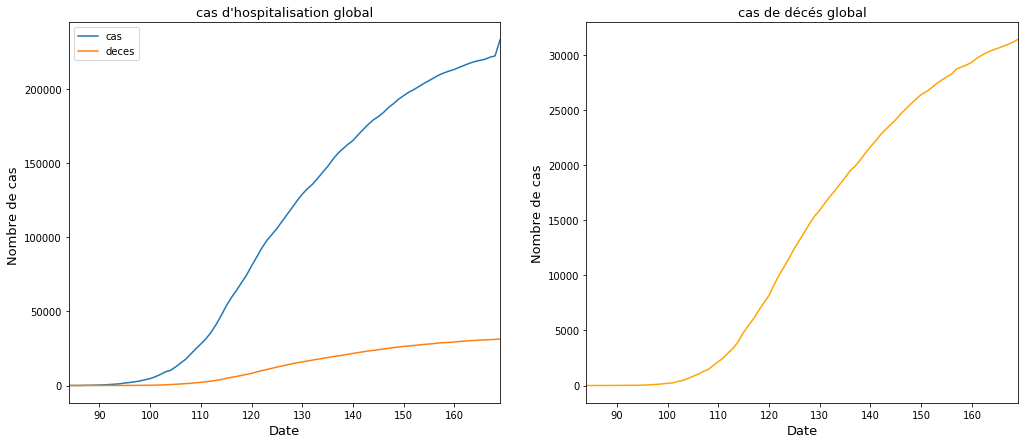

In [54]:
totalConfirme = data["cas"].to_frame()
totalDC = data["deces"]
totale = totalConfirme.join(totalDC)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
totale.plot(ax=ax1)
ax1.set_title("cas d'hospitalisation global", size=13)
ax1.set_ylabel("Nombre de cas ", size=13)
ax1.set_xlabel("Date", size=13)
totalDC.plot(ax=ax2, color='orange')
ax2.set_title("cas de décés global", size=13)
ax2.set_ylabel("Nombre de cas", size=13)
ax2.set_xlabel("Date", size=13)

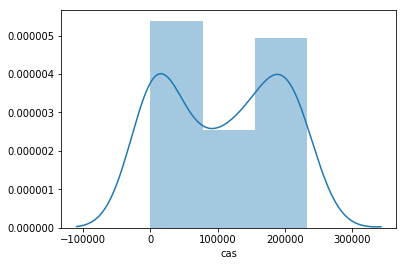

In [55]:
sns.distplot(data["cas"])

# Exemple du modéle SIR

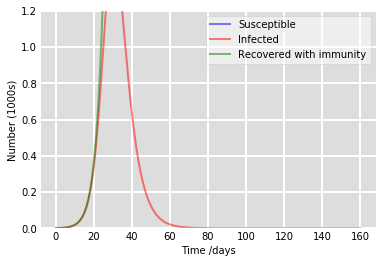

In [56]:
# Total population, N.
N = 10000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.6, 3./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T


# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

https://www.kaggle.com/saga21/covid-global-forecast-sir-model-ml-regressions

# fit sur données synthetiques sans bruit 


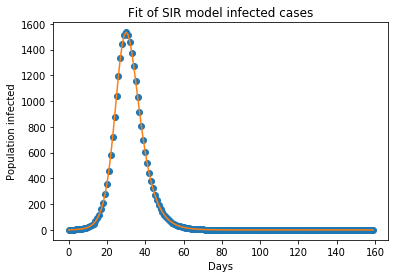

Optimal parameters: beta = 0.6037735849056587  and gamma =  0.30188679245282873


In [57]:

# fitg sur données synthetique sans bruit 
infected = I #géneré par le model SIR
newN = 10000 #comme celui d'avant 
expectedBeta = 0.6
expectedGama = 3./10

# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = infected[0], 0
# Everyone else, S0, is susceptible to infection initially.
S0 = newN - I0 - R0

x = [i for i in range (0,160)]
y = infected


def sir_model(y, x, betas, gammas):
    sus = -betas * y[0] * y[1] / newN
    rec = gammas * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, betas, gammas):
    return integrate.odeint(sir_model, (S0, I0, R0), x, args=(betas, gammas))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, x, y)
fitted = fit_odeint(x, *popt)


plt.plot(x, y, 'o')
plt.plot(x, fitted)
plt.title("Fit of SIR model infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])


# fit sur données synthetiques avec bruit 


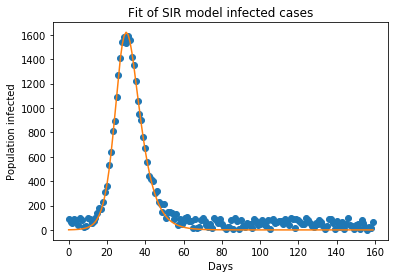

Optimal parameters: beta = 0.59308653938374  and gamma =  0.2892337208569054


In [58]:

# fit sur données synthetique avec bruit 
infected = I #géneré par le model SIR
newN = 10000 #comme celui d'avant 
expectedBeta = 0.6
expectedGama = 3./10

# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = infected[0], 0
# Everyone else, S0, is susceptible to infection initially.
S0 = newN - I0 - R0

x = [i for i in range (0,160)]
y = infected +np.random.randint(100, size=160)


def sir_model(y, x, betas, gammas):
    sus = -betas * y[0] * y[1] / newN
    rec = gammas * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, betas, gammas):
    return integrate.odeint(sir_model, (S0, I0, R0), x, args=(betas, gammas))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, x, y)
fitted = fit_odeint(x, *popt)


plt.plot(x, y, 'o')
plt.plot(x, fitted)
plt.title("Fit of SIR model infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])


# fit sur données réelles


3.0
<class 'list'>


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars


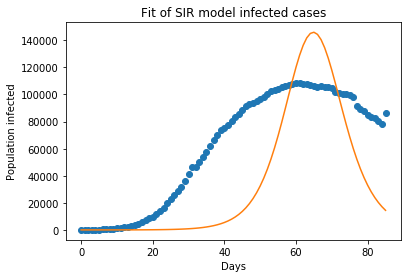

parameters: beta = 2.7312768681861295  and gamma =  2.5429762920066525


In [60]:
infected = data["cas"]  - data["guerisons"]  - data["deces"]
infected = list(infected)
print(infected[0])

print(type(infected))

newN = 60000000

# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = infected[0], 0
# Everyone else, S0, is susceptible to infection initially.
S0 = newN - I0 - R0

x = [i for i in range (0,len(infected))]
y = infected 


def sir_model(y, x, betas, gammas):
    sus = -betas * y[0] * y[1] / newN
    rec = gammas * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, betas, gammas):
    return integrate.odeint(sir_model, (S0, I0, R0), x, args=(betas, gammas))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, x, y)
fitted = fit_odeint(x, *popt)


plt.plot(x, y, 'o')
plt.plot(x, fitted)
plt.title("Fit of SIR model infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("parameters: beta =", popt[0], " and gamma = ", popt[1])
